<a href="https://colab.research.google.com/github/portneon/VIKALP/blob/main/vikalp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HEAD of the dataset:
   Unnamed: 0  Artist               Title          Album    Year        Date  \
0           0  Khalid  Young Dumb & Broke  American Teen  2017.0  2017-03-03   
1           1  Khalid            Location  American Teen  2016.0  2016-04-30   
2           2  Khalid              Better        Suncity  2018.0  2018-09-14   
3           3  Khalid                Talk    Free Spirit  2019.0  2019-02-07   
4           4  Khalid               Saved  American Teen  2017.0  2017-01-13   

                                               Lyric  
0  so you're still thinking of me just like i kno...  
1  send me your location let's focus on communica...  
2  better nothing baby nothing feels better i'm n...  
3  can we just talk can we just talk talk about w...  
4  4   the hard part always seems to last forever...   

TAIL of the dataset:
    Unnamed: 0  Artist                                   Title Album    Year  \
59          59  Khalid  Khalid - Vertigo  (Tradução Português)   

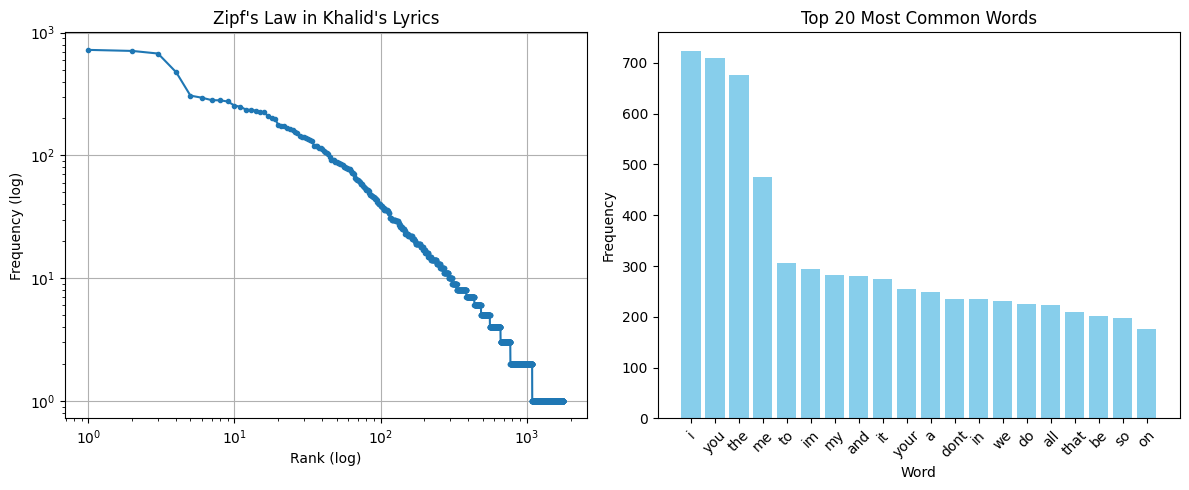

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

url = "https://raw.githubusercontent.com/taylorgaines/songs/main/Khalid.csv"
df = pd.read_csv(url)

print("HEAD of the dataset:")
print(df.head(), "\n")

print("TAIL of the dataset:")
print(df.tail(), "\n")

print("INFO about the dataset:")
print(df.info(), "\n")


print("\n\n\n\n\n\n")


lyrics = df['Lyric'].dropna().str.cat(sep=' ').lower()

lyrics = re.sub(r'[^a-z\s]', '', lyrics)

words = lyrics.split()

word_counts = Counter(words)
sorted_counts = word_counts.most_common()

ranks = range(1, len(sorted_counts) + 1)
frequencies = [count for _, count in sorted_counts]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.loglog(ranks, frequencies, marker='.')
plt.title("Zipf's Law in Khalid's Lyrics")
plt.xlabel("Rank (log)")
plt.ylabel("Frequency (log)")
plt.grid(True)

top_words = sorted_counts[:20]
words_top = [word for word, _ in top_words]
counts_top = [count for _, count in top_words]

plt.subplot(1, 2, 2)
plt.bar(words_top, counts_top, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words")
plt.xlabel("Word")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
